# Deep Learning (2021)

## Convolutional Neural Networks and Image Classification

We have a small animal dataset consisting of $5,000$ images of cats, dogs, fishes, lions, chickens, elephants, butterflies, cows, spiders, and horses, each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1bEwEx72lLrjY_Idj_FgV22atIdjtCV66/view?usp=sharing) and then decompress to the folder the folder `datasets\Animals` for you in the assignment folder.**

In this notebook we build a CNN model using *TF 2.x* to classify these animals. We have a file, <span style="color:red">models.py</span>, which will assist with this ntoebook. There are a number of classes, such as:

1. `AnimalsDatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also help generate next batches for training. `AnimalsDatasetManager` will be passed to CNN model for training and testing.
2. `Layers`: A class providing some static method to create basic CNN layers.
3. `DefaultModel`: A base class for the CNN model.

Firstly, we need to run the following cells to load and preprocess the Animal dataset.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import models
from models import SimplePreprocessor, AnimalsDatasetManager, DefaultModel

In [3]:
def create_label_folder_dict(adir):
    sub_folders= [folder for folder in os.listdir(adir)
                  if os.path.isdir(os.path.join(adir, folder))]
    label_folder_dict= dict()
    for folder in sub_folders:
        item= {folder: os.path.abspath(os.path.join(adir, folder))}
        label_folder_dict.update(item)
    return label_folder_dict

In [4]:
label_folder_dict= create_label_folder_dict("./datasets/Animals")

The below code helps to create a data manager that contains all relevant methods used to manage and process our experimental data. 

In [5]:
sp = SimplePreprocessor(width=32, height=32)
data_manager = AnimalsDatasetManager([sp])
data_manager.load(label_folder_dict, verbose=100)
data_manager.process_data_label()
data_manager.train_valid_test_split()

butterfiles 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cats 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
chickens 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cows 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
dogs 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
elephants 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
fishes 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
horses 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
lions 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
spiders 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Proc

Note that the object `data_manager` has the attributes relating to *the training, validation, and testing sets* as shown belows. You can use them in training your developped models in the sequel.

In [6]:
print(data_manager.X_train.shape, data_manager.y_train.shape)
print(data_manager.X_valid.shape, data_manager.y_valid.shape)
print(data_manager.X_test.shape, data_manager.y_test.shape)
print(data_manager.classes)

(4000, 32, 32, 3) (4000,)
(500, 32, 32, 3) (500,)
(500, 32, 32, 3) (500,)
['butterfiles' 'cats' 'chickens' 'cows' 'dogs' 'elephants' 'fishes'
 'horses' 'lions' 'spiders']


Now we'll write our own model in a way that makes it easy to experiment with different architectures as well as parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters for `YourModel`, which you can find in function `__init__()` for the class `DefaultModel`:**

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout. 
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization. 

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np

Here we have written the code of the initial `YourModel` class. Note that this class inherits from the `DefaultModel` class.

In [15]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 verbose= True):
        super(YourModel, self).__init__(
            name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm,
            is_augmentation, activation_func, optimizer, batch_size, num_epochs, learning_rate, verbose
        )
        self.conv_filter = (3,3)
        self.conv_strides = (1,1)
        self.conv_padding = 'same'
        self.mp_strides = (2,2)
        self.mp_padding = 'same'
        self.model = models.Sequential()
        self.history = None
        
    def build_cnn(self):
        #Insert your code here
        self.model = models.Sequential()
        
        for block in range(self.num_blocks):
            self.add_block(block)
            
        self.model.add(layers.Flatten())
        self.model.add(
            layers.Dense(
                self.num_classes,activation='softmax'
            )
        )
        self.model.compile(
            optimizer=self.optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy']
        )
        
            
            
    def add_block(self,block_num):
        if (block_num == 0):
            self.model.add(
                layers.Conv2D(
                    self.feature_maps[block_num], self.conv_filter, padding=self.conv_padding, activation=self.activation_func, input_shape=(32,32,3)
                )
            )
        else:
            self.model.add(
                layers.Conv2D(
                    self.feature_maps[block_num], self.conv_filter, padding=self.conv_padding, activation=self.activation_func
                )
            )
            
        if self.batch_norm is not None:
            self.model.add(
                layers.BatchNormalization(
                    momentum=0.9
                )
            )
            self.model.add(
                layers.Activation(
                    self.activation_func
                )
            )
            self.model.add(
                layers.Conv2D(
                    self.feature_maps[block_num], self.conv_filter, padding=self.conv_padding, activation=self.activation_func
                )
            )
            self.model.add(
                layers.BatchNormalization(
                    momentum=0.9
                )
            )
            self.model.add(
                layers.Activation(
                    self.activation_func
                )
            )
            self.model.add(
                layers.AveragePooling2D(
                    pool_size=(2,2), strides=self.mp_strides, padding=self.mp_padding
                )
            )
            self.model.add(
                layers.Dropout(
                    rate=self.drop_rate
                )
            )
        else:
            self.model.add(
                layers.Activation(
                    self.activation_func
                )
            )
            self.model.add(
                layers.Conv2D(
                    self.feature_maps[block_num], self.conv_filter, padding=self.conv_padding, activation=self.activation_func
                )
            )
            self.model.add(
                layers.Activation(
                    self.activation_func
                )
            )
            self.model.add(
                layers.AveragePooling2D(
                    pool_size=(2,2), strides=self.mp_strides, padding=self.mp_padding
                )
            )
            self.model.add(
                layers.Dropout(
                    rate=self.drop_rate
                )
            )
            
    def get_history(self):
        return self.history.history

TestModel = YourModel(name='network2',
                        feature_maps=32,
                        num_classes=len(data_manager.classes),
                        num_blocks=4,
                        drop_rate= 0.2,
                        batch_norm=True,
                        optimizer='adam',
                        learning_rate= 0.001)
TestModel.build_cnn()
TestModel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 16, 16, 32)       

Now we can use it to experiment with dropout or batch normalization. We'll use the model to finetune the dropout rate.

What is the final `drop_rate` rate that you'll use? Did dropout improve performance? Did it help reduce overfitting? Note that in this experiment, we set `batch_norm` to `None`, meaning that we do not use the batch normalization.

See Figures below.

It is clear without dropout in the first figure there is overfitting as the validation loss levels out and starts to increase after epoch 15 - this is called the generalisation gap. It is also evident the validation accuracy has levelled off at approximately 60\% while the training accuracy is still climbing at 90%. Therefore, the model is not learning to generalise on unseen data anymore.

As dropout is increased, the generalisation gap is decreasing but at the same time it is clear that the training loss is increasing. Similarly, the gap between the training accuracy and the validation loss is decreasing, however, the training loss is decreasing which means the model must be trained for longer. 

Fromm this experiment, after 20 epochs, the final drop out rate seems to be 0.3 because the model has maintained a good accuracy and it is not overfitting after 20 epochs.

Dropout clearly has improved performance and reduced overfitting, however, too much dropout can cause the model to not learn anything, as is clear in the latter figures below.

Drop out:	0.0
Val Acc:	0.5299999713897705
Train Loss:	0.39971724152565



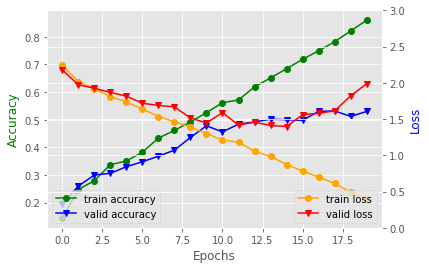

Drop out:	0.05
Val Acc:	0.5199999809265137
Train Loss:	0.4578337073326111



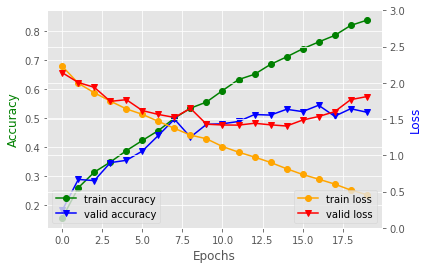

Drop out:	0.1
Val Acc:	0.5460000038146973
Train Loss:	0.6144014596939087



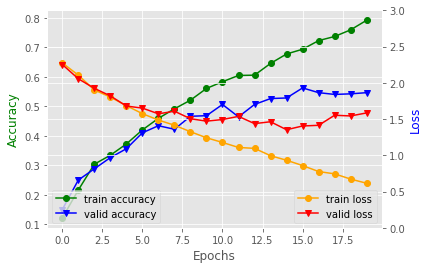

Drop out:	0.15000000000000002
Val Acc:	0.550000011920929
Train Loss:	0.6317368745803833



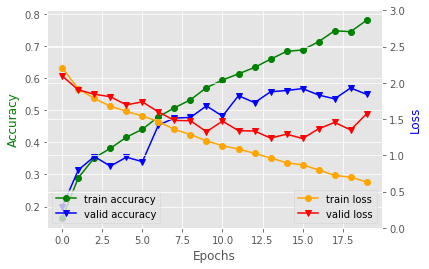

Drop out:	0.2
Val Acc:	0.5440000295639038
Train Loss:	0.7739689350128174



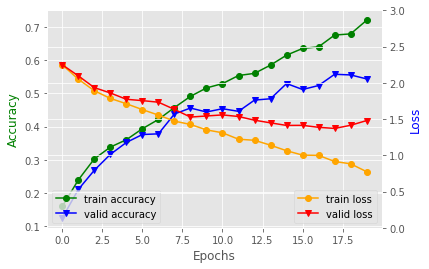

Drop out:	0.25
Val Acc:	0.5080000162124634
Train Loss:	0.8830182552337646



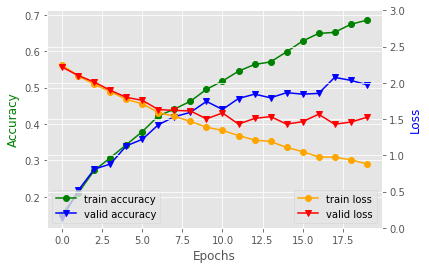

Drop out:	0.3
Val Acc:	0.5580000281333923
Train Loss:	0.8916773796081543



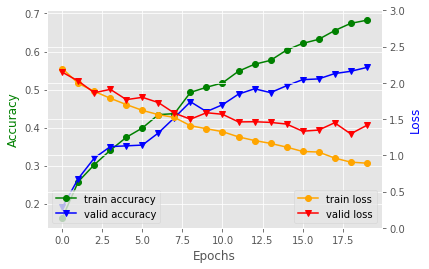

Drop out:	0.4
Val Acc:	0.5479999780654907
Train Loss:	1.076283574104309



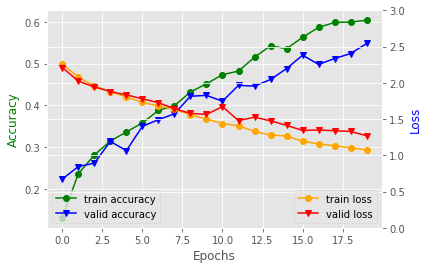

Drop out:	0.5
Val Acc:	0.5120000243186951
Train Loss:	1.1863421201705933



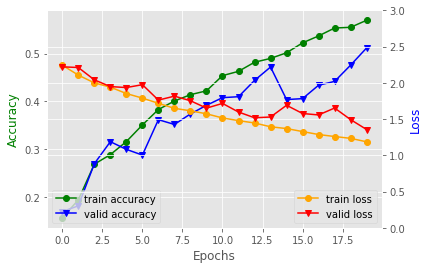

Drop out:	0.6000000000000001
Val Acc:	0.4580000042915344
Train Loss:	1.3728158473968506



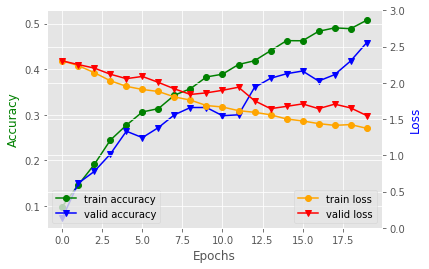

Drop out:	0.7000000000000001
Val Acc:	0.3179999887943268
Train Loss:	1.4826668500900269



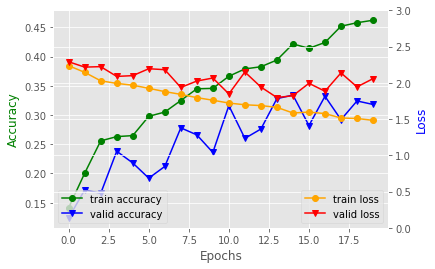

In [16]:
drop_out_rates = np.array([0])
drop_out_rates = np.append(drop_out_rates,[0.05+0.05*i for i in range(6)])
drop_out_rates = np.append(drop_out_rates,[0.05*8+0.1*i for i in range(4)])
train_acc = []
val_acc = []
train_loss = []
val_loss = []
for drop in drop_out_rates:
    finetune = YourModel(name='network',
                        feature_maps=32,
                        num_classes=len(data_manager.classes),
                        num_blocks=4,
                        drop_rate= drop,
                        batch_norm=None,
                        optimizer='adam',
                        learning_rate= 0.001,
                        verbose=False)
    finetune.build_cnn()
    finetune.fit(data_manager, batch_size = 64, num_epochs = 20)
    history = finetune.get_history()
    train_acc.append(history['accuracy'])
    train_loss.append(history['loss'])
    val_acc.append(history['val_accuracy'])
    val_loss.append(history['val_loss'])
    print("Drop out:\t{}\nVal Acc:\t{}\nTrain Loss:\t{}\n".format(drop,
                                                                history['val_accuracy'][-1],
                                                                history['loss'][-1]))
    finetune.plot_progress([0, 3])

In [17]:
drop_out_network = YourModel(name='network4',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.3, # enter your final dropout rate value here
                     batch_norm=None,     
                     optimizer='adam',
                     learning_rate= 0.001)
drop_out_network.build_cnn()
drop_out_network.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_96 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_97 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
average_pooling2d_50 (Averag (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 16, 16, 64)      

Now we can try using batch normalization. We will understand whether it improves the model and how this compares to the model using dropout. 

To have a fair comparison, in this experiment, we set `drop_rate=0` to not use the dropout. You should show the training progress of losses and accuracies and comment about those plots. You can further comment about the efficiency of dropout and batch norm for your training.

See figures below.

With no drop out, batch normalisation has improved some aspects of the model, but hurt others.

When using batch normalisation, the model is learning much faster given the difference in the gradients of the following two figures. Without batch normalisation the model reaches 80% training accuracy after approximately 18 epochs, whereas the same occurs after 7 epochs with batch normalisation. Similarly, with the validation accuracy and in both models, the accuracy reaches around 60%.

Unfortunately, the batch normalisation does introduce more overfitting than was present without batch normalisation, however, the issues raised here will be improved by using dropout and the issues from introducing dropout can be solved by using batch normalisation.

No Batch Normalisation


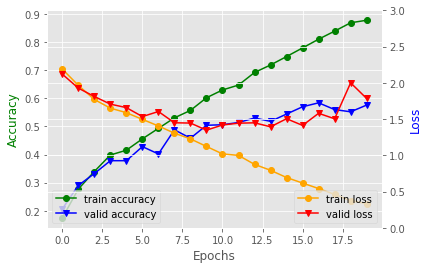

Batch Normalisation


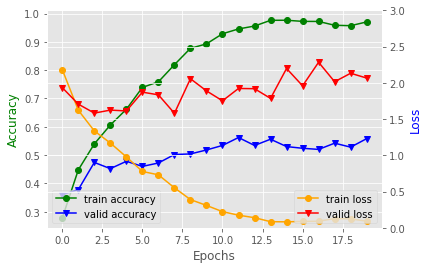

In [18]:
nobatch = YourModel(name='network5',
                        feature_maps=32,
                        num_classes=len(data_manager.classes),
                        num_blocks=4,
                        drop_rate= 0.0,
                        batch_norm=None,
                        optimizer='adam',
                        learning_rate= 0.001,
                        verbose=False)
nobatch.build_cnn()
nobatch.fit(data_manager, batch_size = 64, num_epochs = 20)
nobatch_history = nobatch.get_history()
print('No Batch Normalisation')
nobatch.plot_progress([0,3])

withbatch = YourModel(name='network6',
                        feature_maps=32,
                        num_classes=len(data_manager.classes),
                        num_blocks=4,
                        drop_rate= 0.0,
                        batch_norm=True,
                        optimizer='adam',
                        learning_rate= 0.001,
                        verbose=False)
withbatch.build_cnn()
withbatch.fit(data_manager, batch_size = 64, num_epochs = 20)
withbatch_history = withbatch.get_history()
print('Batch Normalisation')
withbatch.plot_progress([0,3])

We will now try to apply data augmentation to improve the performance. The class `YourModel`, will be extended so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation. Also we need to incorporate early stopping to the training process. Specifically, we can early stop the training if the valid accuracy cannot increase in three consecutive epochs. This may or may not be desired in a certain case but it is required for this problem.

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelBinarizer

def beta(size, alpha):
    gamma_1= tf.random.gamma(shape=[size], alpha=alpha)
    gamma_2 = tf.random.gamma(shape=[size], alpha=alpha)
    return gamma_1 / (gamma_1 + gamma_2)

In [20]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.3,
                 batch_norm = None,
                 is_augmentation = False,
                 is_label_smooth = False,
                 label_smoothing = 0.1,
                 is_data_mixup = False,
                 is_one_hot = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 early_stop = False,
                 verbose= True):
        super(YourModel, self).__init__(
            name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm,
            is_augmentation, activation_func, optimizer, batch_size, num_epochs, learning_rate, verbose)
        self.conv_filter = (3,3)
        self.conv_strides = (1,1)
        self.conv_padding = 'same'
        self.mp_strides = (2,2)
        self.mp_padding = 'same'
        self.is_augmentation = is_augmentation
        self.early_stop = early_stop
        self.is_label_smooth = is_label_smooth
        self.label_smoothing = label_smoothing
        self.is_data_mixup = is_data_mixup
        self.is_one_hot = is_one_hot
        self.model = models.Sequential()
        self.history = None
        
        if self.is_augmentation and not self.is_one_hot:
            self.loss = tf.keras.losses.SparseCategoricalCrossentropy()
        elif self.is_label_smooth:
            self.loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=self.label_smoothing)
        elif self.is_data_mixup:
            self.loss = tf.keras.losses.CategoricalCrossentropy()
        elif self.is_one_hot:
            self.loss = tf.keras.losses.CategoricalCrossentropy()
        else:
            self.loss = tf.keras.losses.SparseCategoricalCrossentropy()
    
    def __call__(self, X):
        return self.model(X)
    
    def build_cnn(self):
        #Insert your code here
        self.model = models.Sequential()
        
        for block in range(self.num_blocks):
            self.add_block(block)
            
        self.model.add(layers.Flatten())
        self.model.add(
            layers.Dense(
                self.num_classes,activation='softmax'
            )
        )
        self.model.compile(
            optimizer=self.optimizer, loss=self.loss,metrics=['accuracy']
        )
        
            
            
    def add_block(self,block_num):
        if (block_num == 0):
            self.model.add(
                layers.Conv2D(
                    self.feature_maps[block_num], self.conv_filter, padding=self.conv_padding, activation=self.activation_func, input_shape=(32,32,3)
                )
            )
        else:
            self.model.add(
                layers.Conv2D(
                    self.feature_maps[block_num], self.conv_filter, padding=self.conv_padding, activation=self.activation_func
                )
            )
            
        if self.batch_norm is not None:
            self.model.add(
                layers.BatchNormalization(
                    momentum=0.9
                )
            )
            self.model.add(
                layers.Activation(
                    self.activation_func
                )
            )
            self.model.add(
                layers.Conv2D(
                    self.feature_maps[block_num], self.conv_filter, padding=self.conv_padding, activation=self.activation_func
                )
            )
            self.model.add(
                layers.BatchNormalization(
                    momentum=0.9
                )
            )
            self.model.add(
                layers.Activation(
                    self.activation_func
                )
            )
            self.model.add(
                layers.AveragePooling2D(
                    pool_size=(2,2), strides=self.mp_strides, padding=self.mp_padding
                )
            )
            self.model.add(
                layers.Dropout(
                    rate=self.drop_rate
                )
            )
        else:
            self.model.add(
                layers.Activation(
                    self.activation_func
                )
            )
            self.model.add(
                layers.Conv2D(
                    self.feature_maps[block_num], self.conv_filter, padding=self.conv_padding, activation=self.activation_func
                )
            )
            self.model.add(
                layers.Activation(
                    self.activation_func
                )
            )
            self.model.add(
                layers.AveragePooling2D(
                    pool_size=(2,2), strides=self.mp_strides, padding=self.mp_padding
                )
            )
            self.model.add(
                layers.Dropout(
                    rate=self.drop_rate
                )
            )
    def compute_accuracy(self, X_test, y_test, batch_size = 64):
        loss, acc= self.model.evaluate(X_test, y_test, batch_size = batch_size)
        return acc
    
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        batch_size = self.batch_size if batch_size is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        
        if self.early_stop:
            early_checkpoint = EarlyStopping(monitor='val_accuracy', patience=3, mode='max')
            callbacks = [early_checkpoint]
        else:
            callbacks = None
        
        if self.is_augmentation:
            datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.2, height_shift_range=0.2)
            datagen.fit(data_manager.X_train)
            data = datagen.flow(data_manager.X_train, data_manager.y_train, batch_size=batch_size)
            self.history = self.model.fit(data,validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                      epochs = num_epochs, batch_size = batch_size, callbacks=callbacks, verbose= self.verbose)
        else:
            self.history = self.model.fit(data_manager.X_train, data_manager.y_train,
                                          validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                          batch_size = batch_size, epochs = num_epochs, callbacks=callbacks, verbose= self.verbose)
        
        
    def one_to_one_hot(self, data_manager):
        #Convert to one hot for data smoothing
        sp = SimplePreprocessor(width=32, height=32)
        data_manager_new = AnimalsDatasetManager([sp])
        
        lb = LabelBinarizer()
        y_train = lb.fit_transform(data_manager.y_train)
        y_valid = lb.transform(data_manager.y_valid)
        y_test = lb.transform(data_manager.y_test)
        
        if self.is_data_mixup:
            X_mix_train = np.zeros(data_manager.X_train.shape)
            y_mix_train = np.zeros((len(data_manager.y_train),len(data_manager.classes)))

            alpha = 0.3
            lam = beta(len(data_manager.y_train),alpha)
            i_21 = np.random.randint(int(len(data_manager.y_train)/2),len(data_manager.y_train),int(len(data_manager.y_train)/2))
            i_22 = np.random.randint(0,int(len(data_manager.y_train)/2),int(len(data_manager.y_train)/2))
            i_2 = np.append(i_21, i_22)
            for i in range(len(data_manager.y_train)):
                X_mix_train[i] = lam[i] * data_manager.X_train[i] + (1 - lam[i]) * data_manager.X_train[i_2[i]]
                y_mix_train[i] = lam[i] * y_train[i] + (1 - lam[i]) * y_train[i_2[i]]
            
            data_manager_new.y_train = y_mix_train
            data_manager_new.X_train = X_mix_train
        else:
            data_manager_new.y_train = y_train
            data_manager_new.X_train = data_manager.X_train
        
        data_manager_new.y_valid = y_valid
        data_manager_new.y_test = y_test
        data_manager_new.X_valid = data_manager.X_valid
        data_manager_new.X_test = data_manager.X_test
        return data_manager_new
        
        
    def get_history(self):
        return self.history.history
    
    def predict(self, X):
        if len(X.shape) == 3:
            X = tf.convert_to_tensor([X,])
            return tf.convert_to_tensor(super(YourModel, self).predict())
        else:
            return tf.convert_to_tensor(super(YourModel, self).predict(X))
    
    def save(self,path):
        self.model.save(path)

<span style="color:red">We must now leverage the data augmentation with dropout and batch norm, and try to observe if we can really boost the performance.</span>

Data Augmentation can boost the validation accuracy during training with horizontal flip and a height and width shit range equal to 0.1. Without data augmentation the model starts to overfit quite early and we see a large generalisation gap. But using data augmentation, it mostly dissapears with increased fluctuation in values. It improves validation accuracy above the training accuracy for roughly 20 epochs, then oscillates and starts to dip below the training accuracy towards the end of training. 

Increasing the height and width shift range to 0.2 improve this effect to slightly later in the training period and reduces the gap between training loss and validation loss towards the end of training.

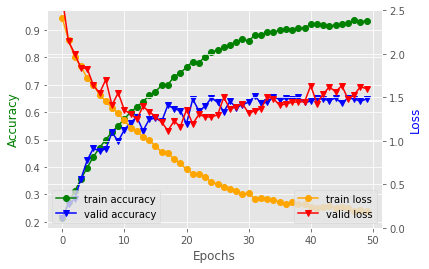

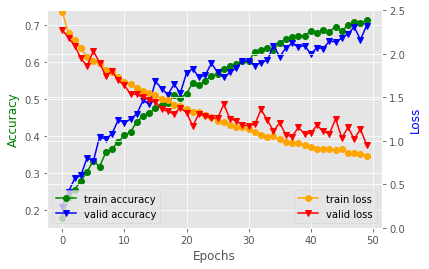

In [21]:
nodaug = YourModel(
    name='network7',
    feature_maps=32,
    num_classes=len(data_manager.classes),
    num_blocks=4,
    drop_rate= 0.3,
    batch_norm=True,
    is_augmentation = False,
    optimizer='adam',
    learning_rate= 0.001,
    early_stop = False,
    verbose=False)
nodaug.build_cnn()
nodaug.fit(data_manager, num_epochs = 50)
nodaug_history = nodaug.get_history()
nodaug.plot_progress([0,2.5])

daug = YourModel(
    name='network8',
    feature_maps=32,
    num_classes=len(data_manager.classes),
    num_blocks=4,
    drop_rate= 0.3,
    batch_norm=True,
    is_augmentation = True,
    optimizer='adam',
    learning_rate= 0.001,
    early_stop = False,
    verbose=False)
daug.build_cnn()
daug.fit(data_manager, num_epochs = 50)
daug_history = daug.get_history()
daug.plot_progress([0,2.5])

<span style="color:red">We can also explore label smoothing technique for improving the generalization ability.</span>

Label smoothing is a super-simple technique used to boost the generalization ability of deep learning models. We will incoroporate label smoothing technique to the above deep learning model and experiment with its performance. There are some papers and documents for label smoothing reference as follows:
- Main paper from Goeff Hinton [link for main paper](https://papers.nips.cc/paper/2019/file/f1748d6b0fd9d439f71450117eba2725-Paper.pdf) and a good article [article link](https://towardsdatascience.com/what-is-label-smoothing-108debd7ef06).

The model above is extended with the label smoothing technique, then we will train a new model and write observations and comments about the result.

Looking at the two figures below, it is clear the generalisation gap has decreased when label smoothing is used. It also appears the loss is still decreasing at the end of training, whereas without label smoothing the loss has been increasing since earlier on in the training period implying the model is overfitting near the end.

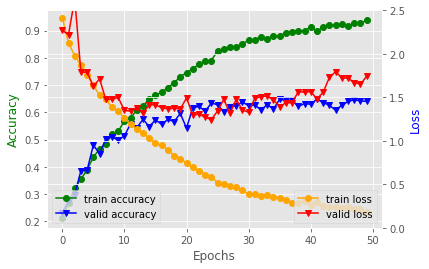

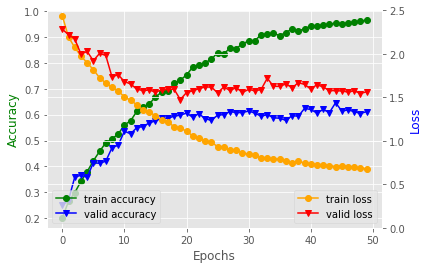

In [22]:
#Run comparison
no_lbl_smth_Model =YourModel(name='network9',
                        feature_maps=32,
                        num_classes=len(data_manager.classes),
                        num_blocks=4,
                        drop_rate= 0.3,
                        batch_norm=True,
                        optimizer='adam',
                        learning_rate= 0.001,
                        is_augmentation = False,
                        is_label_smooth = False,
                        is_one_hot = True,
                        verbose=False)
no_lbl_smth_Model.build_cnn()
data_manager_one_hot = no_lbl_smth_Model.one_to_one_hot(data_manager)
no_lbl_smth_Model.fit(data_manager_one_hot, num_epochs = 50)
no_lbl_smth_Model_history = no_lbl_smth_Model.get_history()
no_lbl_smth_Model.plot_progress([0,2.5])

lbl_smth_Model = YourModel(name='network10',
                        feature_maps=32,
                        num_classes=len(data_manager.classes),
                        num_blocks=4,
                        drop_rate= 0.3,
                        batch_norm=True,
                        optimizer='adam',
                        learning_rate= 0.001,
                        is_augmentation = False,
                        is_label_smooth = True,
                        is_one_hot = True,
                        verbose=False)
lbl_smth_Model.build_cnn()
data_manager_one_hot = lbl_smth_Model.one_to_one_hot(data_manager)
lbl_smth_Model.fit(data_manager_one_hot, num_epochs = 50)
lbl_smth_Model_history = lbl_smth_Model.get_history()
lbl_smth_Model.plot_progress([0,2.5])

<span style="color:red">Another technique we can investigate for using with our model is to explore data mixup technique which can improving generalization ability.</span>

Data mixup is another simple technique used to boost the generalization ability of deep learning models. We will incoroporate data mixup to the above deep learning model and experiment with its performance. There are some papers and documents for label smoothing reference as follows:
- Main paper for data mixup [link for main paper](https://openreview.net/pdf?id=r1Ddp1-Rb) and a good article [article link](https://www.inference.vc/mixup-data-dependent-data-augmentation/).

It appears mixup has dramamtically reduced the generalisation gap, by reducing the validation loss. This produces a much better model because it prevents overfitting even though it reduces validation accuracy. The generalisation gap is still quite large and will therefore need more tuning with other hyperparameters to improve the model.

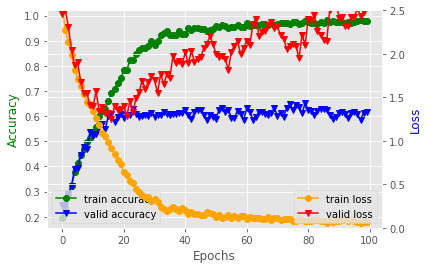

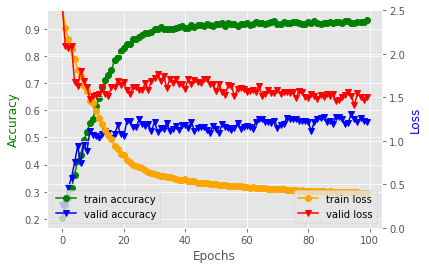

In [23]:
#Run comparison
no_mixup_Model = YourModel(name='network11',
                        feature_maps=48,
                        num_classes=len(data_manager.classes),
                        num_blocks=4,
                        drop_rate= 0.3,
                        batch_norm=True,
                        optimizer='adam',
                        learning_rate= 0.001,
                        is_augmentation = False,
                        is_label_smooth = False,
                        is_data_mixup = False,
                        is_one_hot = True,
                        verbose=False)
no_mixup_Model.build_cnn()
data_manager_mixup = no_mixup_Model.one_to_one_hot(data_manager)
no_mixup_Model.fit(data_manager_mixup, num_epochs = 100)
no_mixup_Model_history = no_mixup_Model.get_history()
no_mixup_Model.plot_progress([0,2.5])

mixup_Model = YourModel(name='network12',
                        feature_maps=48,
                        num_classes=len(data_manager.classes),
                        num_blocks=4,
                        drop_rate= 0.3,
                        batch_norm=True,
                        optimizer='adam',
                        learning_rate= 0.001,
                        is_augmentation = False,
                        is_label_smooth = False,
                        is_data_mixup = True,
                        is_one_hot = True,
                        verbose=False)
mixup_Model.build_cnn()
data_manager_mixup = mixup_Model.one_to_one_hot(data_manager)
mixup_Model.fit(data_manager_mixup, num_epochs = 100)
mixup_Model_history = mixup_Model.get_history()
mixup_Model.plot_progress([0,2.5])

<Figure size 432x288 with 0 Axes>

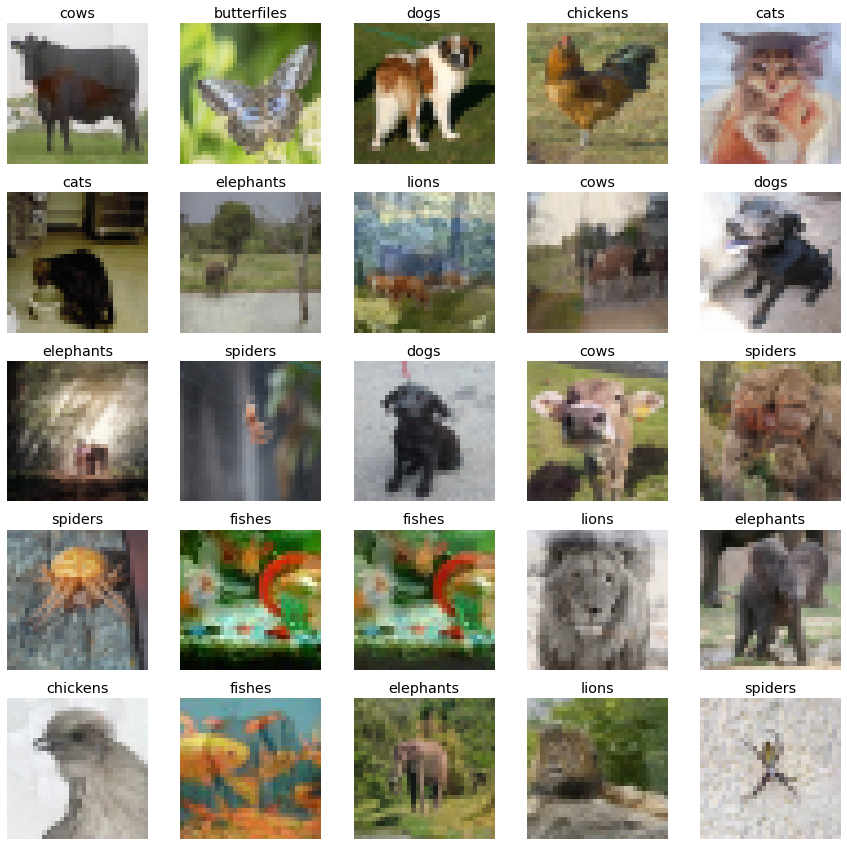

In [24]:
tile_shape=(5, 5)
X = data_manager_mixup.X_train
y_mix_train = data_manager_mixup.y_train
plt.clf()
fig, ax = plt.subplots(tile_shape[0], tile_shape[1], figsize=(3 * tile_shape[1], 3 * tile_shape[0]))
idx = np.random.choice(len(data_manager_mixup.y_train), tile_shape[0] * tile_shape[1])

for i in range(tile_shape[0]):
    for j in range(tile_shape[1]):
        ax[i, j].imshow((X[idx[i * tile_shape[1] + j]] + 1.0)/2)
        ax[i, j].set_title('{}'.format(data_manager.classes[np.argmax(y_mix_train[idx[i * tile_shape[1] + j]])]))
        ax[i, j].grid(False)
        ax[i, j].axis('off')
plt.show()  

<span style="color:red">Now we will investigate adversarial attacks</span>

We will attack the best obtained model with PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.005$ on the testing set. 

Further down, we willl choose a random set of 20 clean images in the testing set and visualize the original and attacked images.


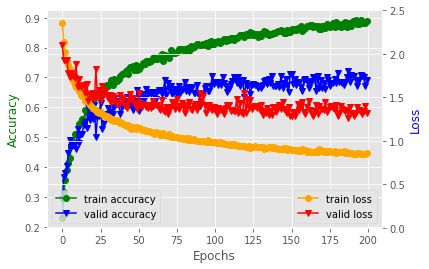

In [25]:
## Best trained model
best_Model = YourModel(name='network13',
                        feature_maps=32,
                        num_classes=len(data_manager.classes),
                        num_blocks=2,
                        drop_rate= 0.3,
                        batch_norm=True,
                        optimizer='adam',
                        learning_rate= 0.001,
                        is_augmentation = True,
                        is_label_smooth = True,
                        is_one_hot = True,
                        early_stop = False,
                        verbose=False)
best_Model.build_cnn()
data_manager_one_hot = best_Model.one_to_one_hot(data_manager)
best_Model.fit(data_manager_one_hot,batch_size = 64, num_epochs = 200)
best_Model_history = best_Model.get_history()
best_Model.plot_progress([0,2.5])

In [26]:
from sklearn.metrics import accuracy_score
# Code has been adapted from Tutorial 7b and https://www.tensorflow.org/tutorials/generative/adversarial_fgsm

def attack_model(model, attack, input_image, input_label,
    epsilon = 0.0313, num_steps = 20, step_size = 0.005,
    clip_value_min=-1.0, clip_value_max=1.0, gamma=0.9):
    
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy
    
    if attack == 'fgsm':
        with tf.GradientTape() as tape:
            tape.watch(input_image)
            pred = model(input_image)
            loss = loss_fn(input_label, pred)
        gradient = tape.gradient(loss, input_image)
        signed_grad = tf.sign(gradient)
        adv_image = input_image + epsilon * tf.sign(gradient)
        adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max)
        adv_image = tf.stop_gradient(adv_image)
    
    elif attack == 'pgd':
        random_noise = tf.random.uniform(
            shape=input_image.shape, 
            minval=-epsilon, 
            maxval=epsilon,
            dtype=tf.dtypes.float64
        )
        adv_image = input_image + random_noise
        for i in range(num_steps):
            with tf.GradientTape(watch_accessed_variables=False) as tape:
                tape.watch(adv_image)
                pred = model(adv_image)
                loss = loss_fn(input_label, pred)
            gradient = tape.gradient(loss, adv_image)
            adv_image = adv_image + step_size * tf.sign(gradient)
            adv_image = tf.clip_by_value(adv_image, input_image-epsilon, input_image+epsilon) 
            adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max)
            adv_image = tf.stop_gradient(adv_image)
    
    elif attack == 'mim':
        random_noise = tf.random.uniform(
            shape=input_image.shape, 
            minval=-epsilon, 
            maxval=epsilon,
            dtype=tf.dtypes.float64
        )
        adv_image = input_image + random_noise
        adv_noise = random_noise
        for i in range(num_steps):
            with tf.GradientTape(watch_accessed_variables=False) as tape:
                tape.watch(adv_image)
                pred = model(adv_image)
                loss = loss_fn(input_label, pred)
            gradient = tape.gradient(loss, adv_image)
            adv_image_new = adv_image + step_size * tf.sign(gradient) 
            adv_image_new = tf.clip_by_value(adv_image_new, input_image-epsilon, input_image+epsilon) 
            adv_image_new = tf.clip_by_value(adv_image_new, clip_value_min, clip_value_max) 
            adv_noise = gamma*adv_noise + (1-gamma)*(adv_image_new - adv_image)
            adv_image = adv_image_new
            adv_image = tf.stop_gradient(adv_image)
        adv_image = adv_image + adv_noise
        adv_image = tf.clip_by_value(adv_image, input_image-epsilon, input_image+epsilon) 
        adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max)
        
    return adv_image

In [27]:
# FGSM

input_image = tf.convert_to_tensor(data_manager.X_test)
input_label = tf.convert_to_tensor(data_manager.y_test)
dm_onehot = best_Model.one_to_one_hot(data_manager)

X_fgsm_test = attack_model(best_Model, 'fgsm', input_image, input_label)
acc = best_Model.compute_accuracy(X_fgsm_test.numpy(),dm_onehot.y_test)
print("Accuracy for attacking using FGSM: {}".format(acc))
acc2 = best_Model.compute_accuracy(data_manager.X_test,dm_onehot.y_test)
print("Accuracy for normal data: {}".format(acc2))

8/8 [==============================] - 0s 2ms/step - loss: 6.1165 - accuracy: 0.0480
Accuracy for attacking using FGSM: 0.04800000041723251
8/8 [==============================] - 0s 3ms/step - loss: 1.1625 - accuracy: 0.7480
Accuracy for normal data: 0.7480000257492065


In [28]:
# PGD

input_image = tf.convert_to_tensor(data_manager.X_test)
input_label = tf.convert_to_tensor(data_manager.y_test)
dm_onehot = best_Model.one_to_one_hot(data_manager)

X_pgd_test = attack_model(best_Model, 'pgd', input_image, input_label)
acc = best_Model.compute_accuracy(X_pgd_test.numpy(),dm_onehot.y_test)
print("Accuracy for attacking using PGD: {}".format(acc))
acc2 = best_Model.compute_accuracy(data_manager.X_test,dm_onehot.y_test)
print("Accuracy for normal data: {}".format(acc2))

8/8 [==============================] - 0s 2ms/step - loss: 17.0338 - accuracy: 0.0040
Accuracy for attacking using PGD: 0.004000000189989805
8/8 [==============================] - 0s 3ms/step - loss: 1.1625 - accuracy: 0.7480
Accuracy for normal data: 0.7480000257492065


In [29]:
# MIM

input_image = tf.convert_to_tensor(data_manager.X_test)
input_label = tf.convert_to_tensor(data_manager.y_test)
dm_onehot = best_Model.one_to_one_hot(data_manager)

X_mim_test = attack_model(best_Model, 'mim', input_image, input_label)
acc = best_Model.compute_accuracy(X_mim_test.numpy(),dm_onehot.y_test)
print("Accuracy for attacking using MIM: {}".format(acc))
acc2 = best_Model.compute_accuracy(data_manager.X_test,dm_onehot.y_test)
print("Accuracy for normal data: {}".format(acc2))

8/8 [==============================] - 0s 2ms/step - loss: 16.9298 - accuracy: 0.0040
Accuracy for attacking using MIM: 0.004000000189989805
8/8 [==============================] - 0s 2ms/step - loss: 1.1625 - accuracy: 0.7480
Accuracy for normal data: 0.7480000257492065


<Figure size 432x288 with 0 Axes>

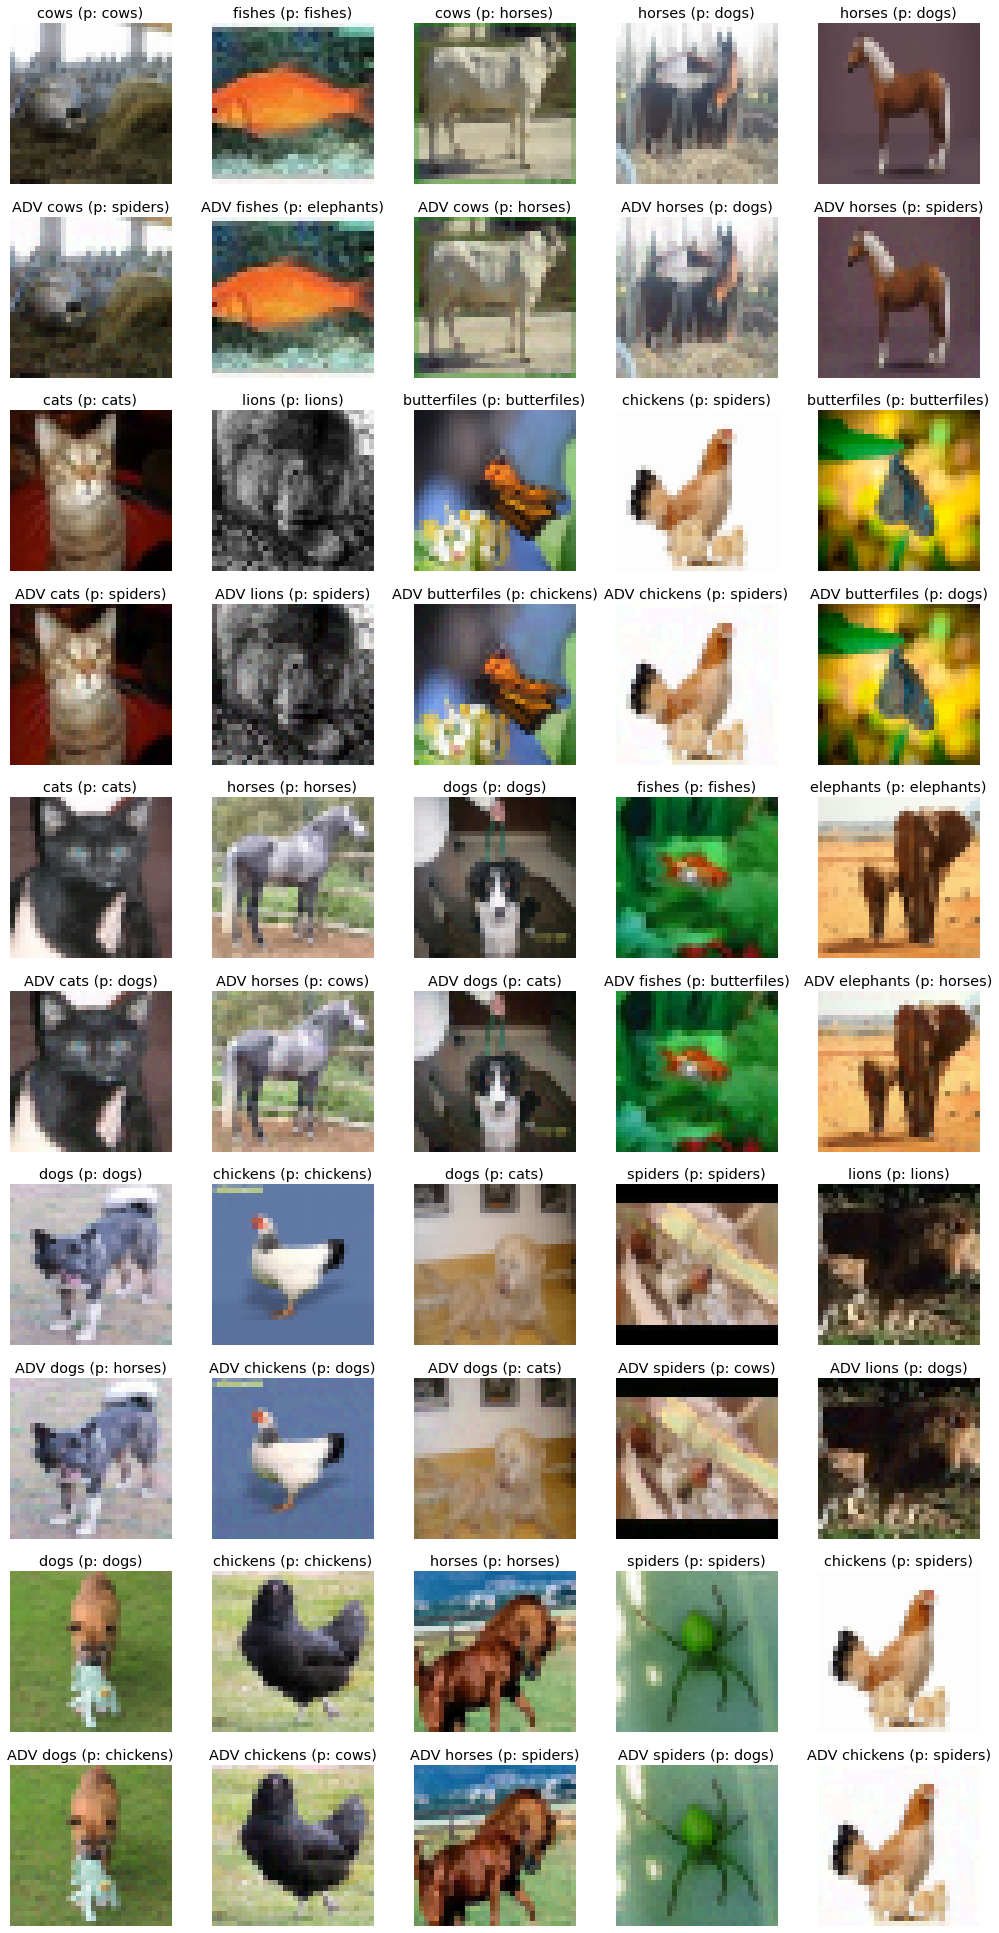

In [30]:
X, X_adv = data_manager.X_test, X_pgd_test
y, y_pred, y_adv_pred = input_label, best_Model.predict(X), best_Model.predict(X_adv)
classes = data_manager.classes
imgs = np.random.randint(0,len(input_label),25)
tile_shape = (10,5)

plt.clf()
fig, ax = plt.subplots(tile_shape[0], tile_shape[1], figsize=(3.5 * tile_shape[1], 3.5 * tile_shape[0]))
idx = -1
for i in range(tile_shape[0]):
    if i % 2 == 0:
        idx +=1
        for j in range(tile_shape[1]):
            ax[i, j].imshow((X[imgs[idx*tile_shape[1]+j]] + 1.0)/2)
            ax[i, j].set_title('{} (p: {})'.format(classes[y[imgs[idx*tile_shape[1]+j]]],
                                                    classes[y_pred[imgs[idx*tile_shape[1]+j]]]))
            ax[i, j].grid(False)
            ax[i, j].axis('off')
    else:
        for j in range(tile_shape[1]):
            ax[i, j].imshow((X_adv[imgs[idx*tile_shape[1]+j]] + 1.0)/2)
            ax[i, j].set_title('ADV {} (p: {})'.format(classes[y[imgs[idx*tile_shape[1]+j]]],
                                                    classes[y_adv_pred[imgs[idx*tile_shape[1]+j]]]))
            ax[i, j].grid(False)
            ax[i, j].axis('off')
plt.show()

<span style="color:red">Now we can see how adversarial training can change the output when a model is attacked.</span> 

We will train a robust model using adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.005}$.

After finishing the training, we will store the best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.005$ on the testing set.

4000/4000 - 8s - loss: 2.2423 - clean_acc (%): 19.0290 - PGD_acc (%): 16.3075 - val_acc (%): 14.4846 - PGD_val_acc (%): 13.9332
4000/4000 - 8s - loss: 2.1025 - clean_acc (%): 26.9046 - PGD_acc (%): 20.9452 - val_acc (%): 22.9458 - PGD_val_acc (%): 22.7557
4000/4000 - 8s - loss: 2.0153 - clean_acc (%): 32.1281 - PGD_acc (%): 23.9606 - val_acc (%): 26.8037 - PGD_val_acc (%): 26.6878
4000/4000 - 8s - loss: 1.9425 - clean_acc (%): 36.1827 - PGD_acc (%): 26.5700 - val_acc (%): 29.6800 - PGD_val_acc (%): 29.5993
4000/4000 - 8s - loss: 1.8792 - clean_acc (%): 39.7446 - PGD_acc (%): 28.5695 - val_acc (%): 32.2506 - PGD_val_acc (%): 32.1952
4000/4000 - 8s - loss: 1.8227 - clean_acc (%): 42.9164 - PGD_acc (%): 30.3265 - val_acc (%): 34.4501 - PGD_val_acc (%): 34.4459
4000/4000 - 8s - loss: 1.7690 - clean_acc (%): 45.8143 - PGD_acc (%): 32.0114 - val_acc (%): 36.4064 - PGD_val_acc (%): 36.4292
4000/4000 - 8s - loss: 1.7180 - clean_acc (%): 48.4838 - PGD_acc (%): 33.6667 - val_acc (%): 38.1384 - P

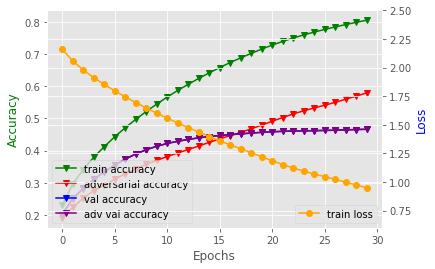

In [31]:
# Some code adapted from Tutorial 7b
def train_step_adv(x, x_adv, y, loss_obj):
    with tf.GradientTape() as tape:
        pred = best_defence(x)
        pred_adv = best_defence(x_adv)
        loss =  (loss_obj(y, pred) + loss_obj(y, pred_adv))/2
        gradients = tape.gradient(loss, best_defence.model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, best_defence.model.trainable_variables))
    return loss
    

best_defence = YourModel(name='network14',
                        feature_maps=48,
                        num_classes=len(data_manager.classes),
                        num_blocks=2,
                        drop_rate= 0.3,
                        batch_norm=True,
                        optimizer='adam',
                        learning_rate= 0.001,
                        is_augmentation = True,
                        is_label_smooth = False,
                        is_data_mixup = False,
                        is_one_hot = True,
                        early_stop = False,
                        verbose=False)
best_defence.build_cnn()

loss_obj = tf.keras.losses.sparse_categorical_crossentropy
train_loss = tf.metrics.Mean(name='train_loss')
train_acc_clean = tf.metrics.SparseCategoricalAccuracy()
val_acc_clean = tf.metrics.SparseCategoricalAccuracy()
val_acc_adv = tf.metrics.SparseCategoricalAccuracy()
train_acc_pgd = tf.metrics.SparseCategoricalAccuracy()
optimizer = tf.optimizers.Adam(learning_rate=0.001)
epsilon = 0.0313
k = 10
eta = 0.005
epochs = 30 
batch_size = 64
X_train = tf.convert_to_tensor(data_manager.X_train)
y_train = tf.convert_to_tensor(data_manager.y_train)
X_valid = tf.convert_to_tensor(data_manager.X_valid)
y_valid = tf.convert_to_tensor(data_manager.y_valid)
X_valid_adv = attack_model(best_defence, 'pgd', X_valid, y_valid, epsilon, k, eta)
history = {'loss':[],'clean_accuracy':[],'adv_accuracy':[],'val_accuracy':[],'val_adv_accuracy':[]}
for epoch in range(epochs):
    progress_bar_train = tf.keras.utils.Progbar(len(y_train), verbose=2)
    for idx_start in range(0, X_train.shape[0], batch_size):
        idx_end = min(X_train.shape[0], idx_start + batch_size)
        batch_image = X_train[idx_start:idx_end]
        batch_label = y_train[idx_start:idx_end]
        for (x, y) in zip([batch_image,], [batch_label,]):
            x_adv = attack_model(best_defence, 'pgd', x, y, epsilon, k, eta)
            loss = train_step_adv(x, x_adv, y, loss_obj)
            y_train_pred = best_defence(x)
            train_acc_clean(y, y_train_pred)
            y_adv_train_pred = best_defence(x_adv)
            train_acc_pgd(y, y_adv_train_pred)
            train_loss(loss)
        y_valid_pred = best_defence(X_valid)
        y_adv_valid_pred = best_defence(X_valid_adv)
        val_acc_clean(y_valid, y_valid_pred)
        val_acc_adv(y_valid, y_adv_valid_pred)
        progress_bar_train.add(x.shape[0], values=[('loss', train_loss.result()), 
                                               ("clean_acc (%)", train_acc_clean.result() * 100),
                                               ("PGD_acc (%)", train_acc_pgd.result() * 100),
                                               ("val_acc (%)", val_acc_clean.result() * 100),
                                               ("PGD_val_acc (%)", val_acc_adv.result() * 100)])

    history['loss'].append(train_loss.result())
    history['clean_accuracy'].append(train_acc_clean.result())
    history['adv_accuracy'].append(train_acc_pgd.result())
    history['val_accuracy'].append(val_acc_clean.result())
    history['val_adv_accuracy'].append(val_acc_adv.result())
    
model_path = "./models/Q310"
model_name = "best_defence"
os.makedirs(os.path.abspath(model_path), exist_ok = True)
best_defence.save(model_path+model_name)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(history['clean_accuracy'], label='train accuracy', color='green', marker="v")
ax1.plot(history['adv_accuracy'], label='adversarial accuracy', color='red', marker = "v")
ax1.plot(history['val_accuracy'], label='val accuracy', color='blue', marker = "v")
ax1.plot(history['val_adv_accuracy'], label='adv val accuracy', color='purple', marker = "v")
ax2.plot(history['loss'], label = 'train loss', color='orange', marker="o")
ax1.legend(loc=3)

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='g')
ax2.set_ylabel('Loss', color='b')
ax2.legend(loc=4)
plt.ylim([0.6, 2.5])
plt.show()

In [32]:
# FGSM
loaded_model = tf.keras.models.load_model(model_path+model_name)
input_image = tf.convert_to_tensor(data_manager.X_test)
input_label = tf.convert_to_tensor(data_manager.y_test)
dm_onehot = best_defence.one_to_one_hot(data_manager)

X_fgsm_test = attack_model(loaded_model, 'fgsm', input_image, input_label)
loss, acc = loaded_model.evaluate(X_fgsm_test.numpy(),dm_onehot.y_test)
print("Accuracy for attacking using FGSM: {}".format(acc))
loss, acc2 = loaded_model.evaluate(data_manager.X_test,dm_onehot.y_test)
print("Accuracy for normal data: {}".format(acc2))

16/16 [==============================] - 0s 6ms/step - loss: 5.5846 - accuracy: 0.2380
Accuracy for attacking using FGSM: 0.23800000548362732
16/16 [==============================] - 0s 2ms/step - loss: 2.3991 - accuracy: 0.5480
Accuracy for normal data: 0.5479999780654907


In [33]:
# PGD

X_pgd_test = attack_model(loaded_model, 'pgd', input_image, input_label)
loss, acc = loaded_model.evaluate(X_pgd_test.numpy(),dm_onehot.y_test)
print("Accuracy for attacking using PGD: {}".format(acc))
loss, acc2 = loaded_model.evaluate(data_manager.X_test,dm_onehot.y_test)
print("Accuracy for normal data: {}".format(acc2))

16/16 [==============================] - 0s 2ms/step - loss: 5.8283 - accuracy: 0.2140
Accuracy for attacking using PGD: 0.21400000154972076
16/16 [==============================] - 0s 2ms/step - loss: 2.3991 - accuracy: 0.5480
Accuracy for normal data: 0.5479999780654907


In [34]:
# MIM

X_mim_test = attack_model(loaded_model, 'mim', input_image, input_label)
loss, acc = loaded_model.evaluate(X_mim_test.numpy(),dm_onehot.y_test)
print("Accuracy for attacking using MIM: {}".format(acc))
loss, acc2 = loaded_model.evaluate(data_manager.X_test,dm_onehot.y_test)
print("Accuracy for normal data: {}".format(acc2))

16/16 [==============================] - 0s 2ms/step - loss: 5.7657 - accuracy: 0.2240
Accuracy for attacking using MIM: 0.2240000069141388
16/16 [==============================] - 0s 2ms/step - loss: 2.3991 - accuracy: 0.5480
Accuracy for normal data: 0.5479999780654907


<Figure size 432x288 with 0 Axes>

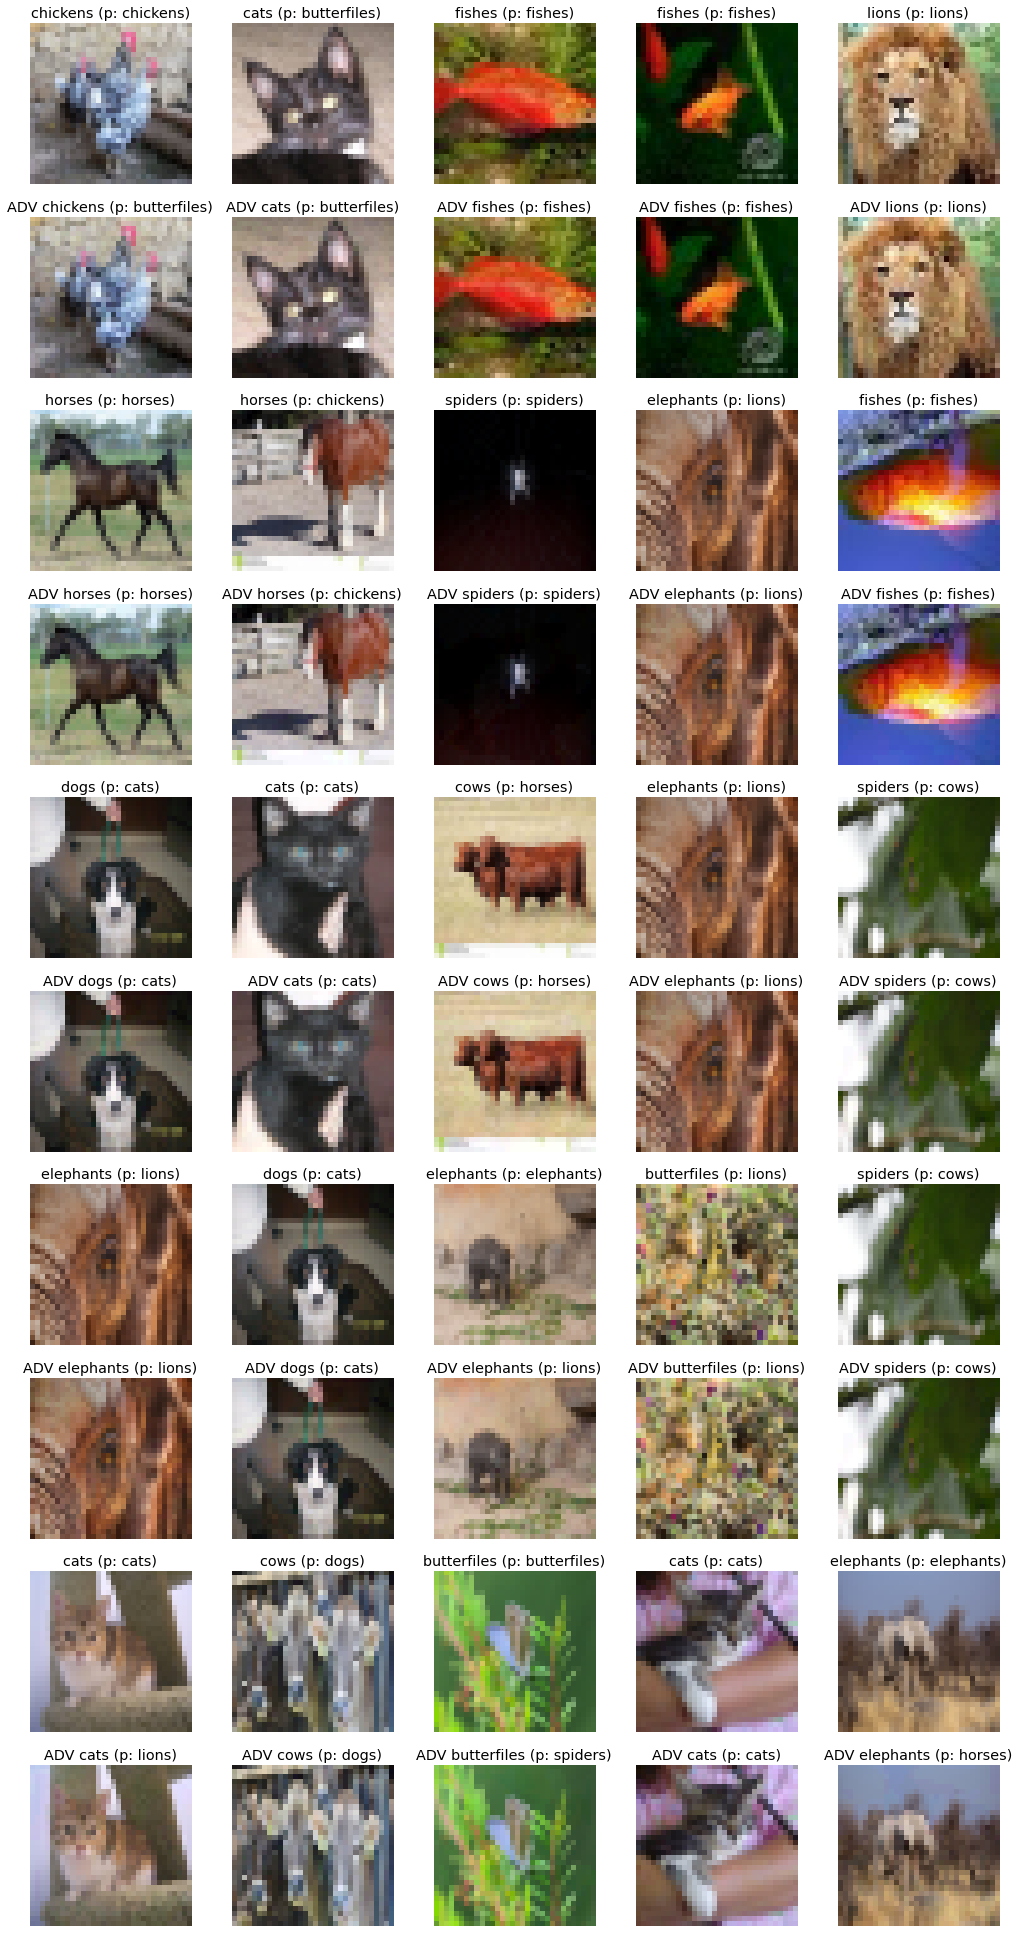

In [35]:
X, X_adv = data_manager.X_test, X_pgd_test
y, y_pred, y_adv_pred = input_label, np.argmax(loaded_model.predict(X),axis=1), np.argmax(loaded_model.predict(X_adv),axis=1)

classes = data_manager.classes
imgs = np.random.randint(0,len(input_label),25)
tile_shape = (10,5)

plt.clf()
fig, ax = plt.subplots(tile_shape[0], tile_shape[1], figsize=(3.5 * tile_shape[1], 3.5 * tile_shape[0]))
idx = -1
for i in range(tile_shape[0]):
    if i % 2 == 0:
        idx +=1
        for j in range(tile_shape[1]):
            k = idx*tile_shape[1]+j
            ax[i, j].imshow((X[imgs[k]] + 1.0)/2)
            ax[i, j].set_title('{} (p: {})'.format(classes[y[imgs[k]]],
                                                    classes[y_pred[imgs[k]]]))
            ax[i, j].grid(False)
            ax[i, j].axis('off')
    else:
        for j in range(tile_shape[1]):
            k = int(idx*tile_shape[1]+j)
            ax[i, j].imshow((X_adv[imgs[k]] + 1.0)/2)
            ax[i, j].set_title('ADV {} (p: {})'.format(classes[y[imgs[k]]],
                                                    classes[y_adv_pred[imgs[k]]]))
            ax[i, j].grid(False)
            ax[i, j].axis('off')
plt.show()

--- 